In [223]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

In [313]:
cidades  = ['Abadia de Goiás','Abadiânia','Acreúna','Adelândia','Água Fria de Goiás','Água Limpa','Águas Lindas de Goiás',
            'Alexânia','Aloândia','Alto Horizonte','Alto Paraíso de Goiás','Alvorada do Norte','Amaralina','Americano do Brasil',
            'Amorinópolis','Anápolis','Anhanguera','Anicuns','Aparecida de Goiânia','Aparecida do Rio Doce','Aporé','Araçu','Aragarças',
            'Aragoiânia','Araguapaz','Arenópolis','Aruanã','Aurilândia','Avelinópolis','Baliza','Barro Alto','Bela Vista de Goiás',
            'Bom Jardim de Goiás','Bom Jesus de Goiás','Bonfinópolis','Bonópolis','Brazabrantes','Britânia','Buriti Alegre',
            'Buriti de Goiás','Buritinópolis','Cabeceiras','Cachoeira Alta','Cachoeira de Goiás','Cachoeira Dourada','Caçu',
            'Caiapônia','Caldas Novas','Caldazinha','Campestre de Goiás','Campinaçu','Campinorte','Campo Alegre de Goiás',
            'Campo Limpo de Goiás','Campos Belos','Campos Verdes','Carmo do Rio Verde','Castelândia','Catalão','Caturaí',
            'Cavalcante','Ceres','Cezarina','Chapadão do Céu','Cidade Ocidental','Cocalzinho de Goiás','Colinas do Sul',
            'Córrego do Ouro','Corumbá de Goiás','Corumbaíba','Cristalina','Cristianópolis','Crixás','Cromínia','Cumari',
            'Damianópolis','Damolândia','Davinópolis','Diorama','Divinópolis de Goiás','Doverlândia','Edealina','Edéia',
            'Estrela do Norte','Faina','Fazenda Nova','Firminópolis','Flores de Goiás','Formosa','Formoso','Gameleira de Goiás',
            'Goianápolis','Goiandira','Goianésia','Goiânia','Goianira','Goiás','Goiatuba','Gouvelândia','Guapó','Guaraíta',
            'Guarani de Goiás','Guarinos','Heitoraí','Hidrolândia','Hidrolina','Iaciara','Inaciolândia','Indiara','Inhumas',
            'Ipameri','Ipiranga de Goiás','Iporá','Israelândia','Itaberaí','Itaguari','Itaguaru','Itajá','Itapaci','Itapirapuã',
            'Itapuranga','Itarumã','Itauçu','Itumbiara','Ivolândia','Jandaia','Jaraguá','Jataí','Jaupaci','Jesúpolis','Joviânia',
            'Jussara','Lagoa Santa','Leopoldo de Bulhões','Luziânia','Mairipotaba','Mambaí','Mara Rosa','Marzagão','Matrinchã',
            'Maurilândia','Mimoso de Goiás','Minaçu','Mineiros','Moiporá','Monte Alegre de Goiás','Montes Claros de Goiás',
            'Montividiu','Montividiu do Norte','Morrinhos','Morro Agudo de Goiás','Mossâmedes','Mozarlândia','Mundo Novo',
            'Mutunópolis','Nazário','Nerópolis','Niquelândia','Nova América','Nova Aurora','Nova Crixás','Nova Glória',
            'Nova Iguaçu de Goiás','Nova Roma','Nova Veneza','Novo Brasil','Novo Gama','Novo Planalto','Orizona',
            'Ouro Verde de Goiás','Ouvidor','Padre Bernardo','Palestina de Goiás','Palmeiras de Goiás','Palmelo','Palminópolis',
            'Panamá','Paranaiguara','Paraúna','Perolândia','Petrolina de Goiás','Pilar de Goiás','Piracanjuba','Piranhas',
            'Pirenópolis','Pires do Rio','Planaltina','Pontalina','Porangatu','Porteirão','Portelândia','Posse',
            'Professor Jamil','Quirinópolis','Rialma','Rianápolis','Rio Quente','Rio Verde','Rubiataba','Sanclerlândia',
            'Santa Bárbara de Goiás','Santa Cruz de Goiás','Santa Fé de Goiás','Santa Helena de Goiás','Santa Isabel',
            'Santa Rita do Araguaia','Santa Rita do Novo Destino','Santa Rosa de Goiás','Santa Tereza de Goiás',
            'Santa Terezinha de Goiás','Santo Antônio da Barra','Santo Antônio de Goiás','Santo Antônio do Descoberto',
            'São Domingos','São Francisco de Goiás','São João da Paraúna','São João d’Aliança','São Luís de Montes Belos',
            'São Luíz do Norte','São Miguel do Araguaia','São Miguel do Passa Quatro','São Patrício','São Simão',
            'Senador Canedo','Serranópolis','Silvânia','Simolândia','Sítio d’Abadia','Taquaral de Goiás','Teresina de Goiás',
            'Terezópolis de Goiás','Três Ranchos','Trindade','Trombas','Turvânia','Turvelândia','Uirapuru','Uruaçu','Uruana',
            'Urutaí','Valparaíso de Goiás','Varjão','Vianópolis','Vicentinópolis','Vila Boa','Vila Propício']
anos = ['2018','2019','2020','2021','2022']
#anos = ['2021']

In [314]:
df = pd.DataFrame()
for cidade in cidades:
    for ano in anos:
        nova_cidade = cidade.replace(" ", "+")
        print(nova_cidade, ano)
        dados = requests.get(f'https://www.tcmgo.tc.br/pentaho/plugin/cda/api/doQuery?paramparamMunicipio={nova_cidade}&paramparamAno={ano}&path=%2Fsystem%2Fcidadao%2Fdashboards%2FDespesas.cda&dataAccessId=sqlEmpenhos&outputIndexId=1&pageSize=0&pageStart=0&paramsearchBox=').json()
        dados = dados['resultset']
        df1 = pd.DataFrame (dados,columns = ['data_empenho_id','numero_empenho','natureza_despesa_id','orgao','funcao','subfuncao',
                                   'credor_id','nome_credor','valor_empenho','valor_anulacao','total_liquidado','total_op',
                                   'situacao_cadastral','motivo_situacao','sancao','elemento_despesa','especificacao',
                                    'acao_detalhada'])
        df1=df1.assign(cidade=cidade)
        df1=df1.assign(ano=ano)
        df = df.append([df1])
df.reset_index(inplace = True)


Abadia+de+Goiás 2018
Abadia+de+Goiás 2019
Abadia+de+Goiás 2020
Abadia+de+Goiás 2021
Abadia+de+Goiás 2022
Abadiânia 2018
Abadiânia 2019
Abadiânia 2020
Abadiânia 2021
Abadiânia 2022
Acreúna 2018
Acreúna 2019
Acreúna 2020
Acreúna 2021
Acreúna 2022
Adelândia 2018
Adelândia 2019
Adelândia 2020
Adelândia 2021
Adelândia 2022
Água+Fria+de+Goiás 2018
Água+Fria+de+Goiás 2019
Água+Fria+de+Goiás 2020
Água+Fria+de+Goiás 2021
Água+Fria+de+Goiás 2022
Água+Limpa 2018
Água+Limpa 2019
Água+Limpa 2020
Água+Limpa 2021
Água+Limpa 2022
Águas+Lindas+de+Goiás 2018
Águas+Lindas+de+Goiás 2019
Águas+Lindas+de+Goiás 2020
Águas+Lindas+de+Goiás 2021
Águas+Lindas+de+Goiás 2022
Alexânia 2018
Alexânia 2019
Alexânia 2020
Alexânia 2021
Alexânia 2022
Aloândia 2018
Aloândia 2019
Aloândia 2020
Aloândia 2021
Aloândia 2022
Alto+Horizonte 2018
Alto+Horizonte 2019
Alto+Horizonte 2020
Alto+Horizonte 2021
Alto+Horizonte 2022
Alto+Paraíso+de+Goiás 2018
Alto+Paraíso+de+Goiás 2019
Alto+Paraíso+de+Goiás 2020
Alto+Paraíso+de+Goiás 20

Goianápolis 2022
Goiandira 2018
Goiandira 2019
Goiandira 2020
Goiandira 2021
Goiandira 2022
Goianésia 2018
Goianésia 2019
Goianésia 2020
Goianésia 2021
Goianésia 2022
Goiânia 2018
Goiânia 2019
Goiânia 2020
Goiânia 2021
Goiânia 2022
Goianira 2018
Goianira 2019
Goianira 2020
Goianira 2021
Goianira 2022
Goiás 2018
Goiás 2019
Goiás 2020
Goiás 2021
Goiás 2022
Goiatuba 2018
Goiatuba 2019
Goiatuba 2020
Goiatuba 2021
Goiatuba 2022
Gouvelândia 2018
Gouvelândia 2019
Gouvelândia 2020
Gouvelândia 2021
Gouvelândia 2022
Guapó 2018
Guapó 2019
Guapó 2020
Guapó 2021
Guapó 2022
Guaraíta 2018
Guaraíta 2019
Guaraíta 2020
Guaraíta 2021
Guaraíta 2022
Guarani+de+Goiás 2018
Guarani+de+Goiás 2019
Guarani+de+Goiás 2020
Guarani+de+Goiás 2021
Guarani+de+Goiás 2022
Guarinos 2018
Guarinos 2019
Guarinos 2020
Guarinos 2021
Guarinos 2022
Heitoraí 2018
Heitoraí 2019
Heitoraí 2020
Heitoraí 2021
Heitoraí 2022
Hidrolândia 2018
Hidrolândia 2019
Hidrolândia 2020
Hidrolândia 2021
Hidrolândia 2022
Hidrolina 2018
Hidrolina 201

Quirinópolis 2019
Quirinópolis 2020
Quirinópolis 2021
Quirinópolis 2022
Rialma 2018
Rialma 2019
Rialma 2020
Rialma 2021
Rialma 2022
Rianápolis 2018
Rianápolis 2019
Rianápolis 2020
Rianápolis 2021
Rianápolis 2022
Rio+Quente 2018
Rio+Quente 2019
Rio+Quente 2020
Rio+Quente 2021
Rio+Quente 2022
Rio+Verde 2018
Rio+Verde 2019
Rio+Verde 2020
Rio+Verde 2021
Rio+Verde 2022
Rubiataba 2018
Rubiataba 2019
Rubiataba 2020
Rubiataba 2021
Rubiataba 2022
Sanclerlândia 2018
Sanclerlândia 2019
Sanclerlândia 2020
Sanclerlândia 2021
Sanclerlândia 2022
Santa+Bárbara+de+Goiás 2018
Santa+Bárbara+de+Goiás 2019
Santa+Bárbara+de+Goiás 2020
Santa+Bárbara+de+Goiás 2021
Santa+Bárbara+de+Goiás 2022
Santa+Cruz+de+Goiás 2018
Santa+Cruz+de+Goiás 2019
Santa+Cruz+de+Goiás 2020
Santa+Cruz+de+Goiás 2021
Santa+Cruz+de+Goiás 2022
Santa+Fé+de+Goiás 2018
Santa+Fé+de+Goiás 2019
Santa+Fé+de+Goiás 2020
Santa+Fé+de+Goiás 2021
Santa+Fé+de+Goiás 2022
Santa+Helena+de+Goiás 2018
Santa+Helena+de+Goiás 2019
Santa+Helena+de+Goiás 2020
Sa

ConnectionError: HTTPSConnectionPool(host='www.tcmgo.tc.br', port=443): Max retries exceeded with url: /pentaho/plugin/cda/api/doQuery?paramparamMunicipio=S%C3%A3o+Jo%C3%A3o+da+Para%C3%BAna&paramparamAno=2021&path=%2Fsystem%2Fcidadao%2Fdashboards%2FDespesas.cda&dataAccessId=sqlEmpenhos&outputIndexId=1&pageSize=0&pageStart=0&paramsearchBox= (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000026B8F24E280>: Failed to establish a new connection: [WinError 10060] Uma tentativa de conexão falhou porque o componente conectado não respondeu\r\ncorretamente após um período de tempo ou a conexão estabelecida falhou\r\nporque o host conectado não respondeu'))

In [295]:
df

,index,data_empenho_id,numero_empenho,natureza_despesa_id,orgao,funcao,subfuncao,credor_id,nome_credor,valor_empenho,...,total_liquidado,total_op,situacao_cadastral,motivo_situacao,sancao,elemento_despesa,especificacao,acao_detalhada,cidade,ano
0,0,01/01/2021,79763,33901400,ABADIA GOIAS - FUNDO MUNICIPAL DE PREVIDENCIA,Previdência Social,Previdência Especial,00085033430106,REGINALDO SALVIANO LEITE,220.00,...,220.00,220.00,CPF Regular,,,Diárias - Civil,EMPENHO RELATIVO A DESPESA COM DIARIA CONCEDID...,ADMINISTRACAO DO REGIME PROP. PREVIDENCIA,Abadia de Goiás,2021
1,1,02/01/2021,3517,33903999,PODER LEGISLATIVO,Legislativa,Ação Legislativa,17558011000194,SUPERAWEBX INFORMATICA LTDA-ME,2520.00,...,2520.00,2520.00,Ativa,,,"Outros Serviços De Terceiros, Pessoa Jurídica",Prestacao de Servicos de Hospedagem e manutenc...,MANUT.ATIV.PODER LEGISLATIVO MUNICIPAL,Abadia de Goiás,2021
2,2,02/01/2021,79942,33903910,PODER EXECUTIVO,Educação,Ensino Fundamental,01569466000175,ARQUIDIOCESE DE GOIANIA,13879.44,...,13879.44,13879.44,Ativa,,,Locação De Imóveis,EMPENHO RELATIVO DESPESA COM 001 TERMO ADITIVO...,MANUTENCAO DO ENSINO FUNDAMENTAL,Abadia de Goiás,2021
3,3,04/01/2021,79599,31909400,FMS,Saúde,Atenção Básica,36769898000104,VIDAPLAN-PLANTOES MEDICOS LTDA,11000.00,...,11000.00,11000.00,Ativa,,,Indenizações e Restituições Trabalhistas,EMPENHO RELATIVO DESPESA COM PRESTACAO DE SERV...,MANUTENCAO FUNDO MUNICIPAL DE SAUDE-FMS,Abadia de Goiás,2021
4,4,04/01/2021,79604,31909400,FMS,Saúde,Atenção Básica,39887343000155,CARVALH0 DINIZ SERVICOS MEDICOS,10100.00,...,10100.00,10100.00,Ativa,,,Indenizações e Restituições Trabalhistas,EMPENHO RELATIVO DESPESA COM PRESTACAO DE SERV...,MANUTENCAO FUNDO MUNICIPAL DE SAUDE-FMS,Abadia de Goiás,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613509,3692,29/12/2021,94091,33903021,FMS,Saúde,Assistênica Hospitalar e Ambulatorial,27909866000176,UNIVERSAL COMERCIO E PRESTACAO DE SERVICOS EIRELI,141.42,...,141.42,141.42,Ativa,,,Material De Copa e Cozinha,VALOR EMPENHADO PARA ATENDER DESPESAS COM AQUI...,MANUTENCAO DO FMS,Vila Propício,2021
1613510,3693,30/12/2021,4275,33903016,PODER LEGISLATIVO,Legislativa,Ação Legislativa,26625228000160,DIWAN - SUPRIMENTOS DE ESCRITORIO LTDA.,861.95,...,861.95,861.95,Ativa,,,Material De Expediente,DESPESA QUE SE EMPENHA PARA AQUISICAO DE MATER...,MANUTENCAO DA CAMARA MUNICIPAL,Vila Propício,2021
1613511,3694,30/12/2021,4278,33903919,PODER LEGISLATIVO,Legislativa,Ação Legislativa,33493500000161,IRIS ALVES PEIXOTO 01946646199,1150.00,...,1150.00,1150.00,Ativa,,,Manutenção E Conservação De Veículos,DESPESA QUE SE EMPENHA PARA PRESTACAO DE SERVI...,MANUTENCAO DA CAMARA MUNICIPAL,Vila Propício,2021
1613512,3695,30/12/2021,4277,33903007,PODER LEGISLATIVO,Legislativa,Ação Legislativa,02407148000170,VILSON CAVALCANTE DA FONSECA ME,1125.11,...,1125.11,1125.11,Ativa,,,Gêneros De Alimentação,DESPESA QUE SE EMPENHA PARA AQUISICAO DE REFEI...,MANUTENCAO DA CAMARA MUNICIPAL,Vila Propício,2021


In [303]:
## CNPJ DA CENTI ,'09590567000130', 14419896000152
values=['00396104000167','04294699000109']
df_filtro = df[df["credor_id"].isin(values)]


In [304]:
df_filtro



,index,data_empenho_id,numero_empenho,natureza_despesa_id,orgao,funcao,subfuncao,credor_id,nome_credor,valor_empenho,...,total_liquidado,total_op,situacao_cadastral,motivo_situacao,sancao,elemento_despesa,especificacao,acao_detalhada,cidade,ano
48057,82,04/01/2021,52337,33904004,PODER EXECUTIVO,Administração,Administração Geral,04294699000109,OLIVEIRA E TORREZAN LTDA,10647.48,...,0.00,0.00,Ativa,,,Locação de Software,IMPORTANCIA QUE SE EMPENHA PARA OCORRER DESPES...,MAN.DAS ATIVID.ADMINISTRATIVAS EM GERAL,Alto Horizonte,2021
48239,264,04/01/2021,51863,33904004,PODER EXECUTIVO,Administração,Administração Geral,04294699000109,OLIVEIRA E TORREZAN LTDA,156000.00,...,21294.96,21294.96,Ativa,,,Locação de Software,IMPORTANCIA QUE SE EMPENHA PARA OCORRER DESPES...,MAN.DAS ATIVID.ADMINISTRATIVAS EM GERAL,Alto Horizonte,2021
106366,140,04/01/2021,421,33904004,APARECIDA DE GOIANIA - APARECIDAPREV,Previdência Social,Previdência do Regime Estatutário,04294699000109,SANTOS OLIVEIRA TORREZAN LTDAME,13159.11,...,13159.11,13159.11,Ativa,,,Locação de Software,CONTRATACAO DE EMPRESA ESPECIALIZADA PARA LOCA...,GESTAO E MAN. DO APARECIDAPREV,Aparecida de Goiânia,2021
106560,334,04/01/2021,422,33904017,APARECIDA DE GOIANIA - APARECIDAPREV,Previdência Social,Previdência do Regime Estatutário,04294699000109,SANTOS OLIVEIRA TORREZAN LTDAME,1248.15,...,1248.15,1248.15,Ativa,,,Conteúdo de Web,CONTRATACAO DE EMPRESA ESPECIALIZADA MANUTENCA...,GESTAO E MAN. DO APARECIDAPREV,Aparecida de Goiânia,2021
113154,6928,25/03/2021,5384,33904004,APARECIDA DE GOIANIA - APARECIDAPREV,Previdência Social,Previdência do Regime Estatutário,04294699000109,SANTOS OLIVEIRA TORREZAN LTDAME,52636.44,...,39477.33,39477.33,Ativa,,,Locação de Software,EMPENHO REFERENTE A LOCACAO DE SOFTWARE DE CON...,GESTAO E MAN. DO APARECIDAPREV,Aparecida de Goiânia,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561957,39,06/01/2021,37044,33903905,PODER EXECUTIVO,Administração,Administração Geral,04294699000109,SANTOS OLIVEIRA E TORREZAN LTDA,27000.00,...,27000.00,27000.00,Ativa,,,Serviços Técnicos Profissionais,IMPORTÂNCIA QUE SE EMPENHA PROVENIENTE DE CONT...,MANUT. DE ATIV. DA SEC. DE ADMINISTRACAO,Uruana,2021
1563465,1547,20/04/2021,39697,33903905,PODER EXECUTIVO,Administração,Administração Geral,04294699000109,SANTOS OLIVEIRA E TORREZAN LTDA,108000.00,...,81000.00,81000.00,Ativa,,,Serviços Técnicos Profissionais,IMPORTÂNCIA QUE SE EMPENHA PROVENIENTE DE CONT...,MANUT. DE ATIV. DA SEC. DE ADMINISTRACAO,Uruana,2021
1584487,47,11/01/2021,116,33904011,PODER EXECUTIVO,Administração,Administração Geral,00396104000167,J.A DE LIMA & CIA LTDA.,14000.00,...,14000.00,14000.00,Ativa,,,Serviços Técnicos Profissionais de TIC,DESPESA PROVENIENTE DE PRESTAÇÃO DE SERVIÇOS D...,MANUTENCAO DA SECRETARIA ADM EM GERAL,Varjão,2021
1585073,633,15/03/2021,15376,33904006,PODER EXECUTIVO,Administração,Administração Geral,00396104000167,J.A DE LIMA & CIA LTDA.,84000.00,...,70000.00,70000.00,Ativa,,,Hospedagens de Sistemas e Sites,DESPESA PROVENIENTE DE DESPESA PROVENIENTE DE ...,MANUTENCAO DA SECRETARIA ADM EM GERAL,Varjão,2021


In [305]:
dfgroup = df_filtro.groupby(['cidade']).sum()

In [306]:
df_sorted = dfgroup.sort_values('valor_empenho')


In [307]:
df_sorted.head(74)

,index,valor_empenho,valor_anulacao,total_liquidado,total_op
cidade,,,,,
Leopoldo de Bulhões,241,277.03,0.00,277.03,277.03
Iaciara,143,3336.00,0.00,3316.00,3316.00
Pontalina,3727,4000.00,0.00,4000.00,4000.00
Itaguari,31,4560.00,0.00,4560.00,4560.00
Posse,1314,5016.00,0.00,4560.00,4560.00
Ouro Verde de Goiás,32,7920.00,0.00,7920.00,7920.00
Cezarina,25,10500.00,0.00,10500.00,10500.00
Formosa,764,11573.40,0.00,11573.40,11573.40
Itauçu,19,12000.00,0.00,12000.00,12000.00


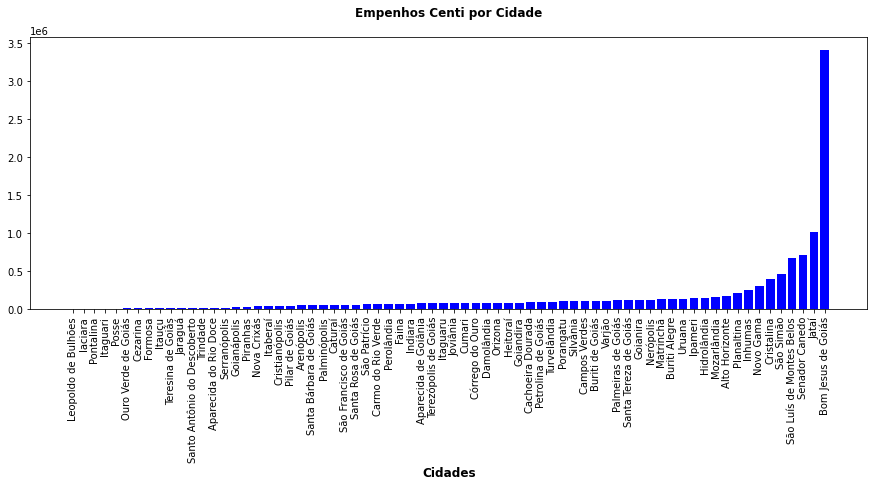

In [308]:
plt.figure(figsize=[15,5])
plt.bar(df_sorted.index, df_sorted.valor_empenho, color = 'blue', width = 0.8, align = 'center', )
plt.title('Empenhos Centi por Cidade\n', {'fontsize': 12,'fontweight': 'bold'})
plt.xlabel('Cidades' ,{'fontsize': 12,'fontweight': 'bold'})
plt.xticks(rotation=90)
plt.show()

In [296]:
df_atual=df.assign(empresa = '')

In [297]:
df_atual

,index,data_empenho_id,numero_empenho,natureza_despesa_id,orgao,funcao,subfuncao,credor_id,nome_credor,valor_empenho,...,total_op,situacao_cadastral,motivo_situacao,sancao,elemento_despesa,especificacao,acao_detalhada,cidade,ano,empresa
0,0,01/01/2021,79763,33901400,ABADIA GOIAS - FUNDO MUNICIPAL DE PREVIDENCIA,Previdência Social,Previdência Especial,00085033430106,REGINALDO SALVIANO LEITE,220.00,...,220.00,CPF Regular,,,Diárias - Civil,EMPENHO RELATIVO A DESPESA COM DIARIA CONCEDID...,ADMINISTRACAO DO REGIME PROP. PREVIDENCIA,Abadia de Goiás,2021,
1,1,02/01/2021,3517,33903999,PODER LEGISLATIVO,Legislativa,Ação Legislativa,17558011000194,SUPERAWEBX INFORMATICA LTDA-ME,2520.00,...,2520.00,Ativa,,,"Outros Serviços De Terceiros, Pessoa Jurídica",Prestacao de Servicos de Hospedagem e manutenc...,MANUT.ATIV.PODER LEGISLATIVO MUNICIPAL,Abadia de Goiás,2021,
2,2,02/01/2021,79942,33903910,PODER EXECUTIVO,Educação,Ensino Fundamental,01569466000175,ARQUIDIOCESE DE GOIANIA,13879.44,...,13879.44,Ativa,,,Locação De Imóveis,EMPENHO RELATIVO DESPESA COM 001 TERMO ADITIVO...,MANUTENCAO DO ENSINO FUNDAMENTAL,Abadia de Goiás,2021,
3,3,04/01/2021,79599,31909400,FMS,Saúde,Atenção Básica,36769898000104,VIDAPLAN-PLANTOES MEDICOS LTDA,11000.00,...,11000.00,Ativa,,,Indenizações e Restituições Trabalhistas,EMPENHO RELATIVO DESPESA COM PRESTACAO DE SERV...,MANUTENCAO FUNDO MUNICIPAL DE SAUDE-FMS,Abadia de Goiás,2021,
4,4,04/01/2021,79604,31909400,FMS,Saúde,Atenção Básica,39887343000155,CARVALH0 DINIZ SERVICOS MEDICOS,10100.00,...,10100.00,Ativa,,,Indenizações e Restituições Trabalhistas,EMPENHO RELATIVO DESPESA COM PRESTACAO DE SERV...,MANUTENCAO FUNDO MUNICIPAL DE SAUDE-FMS,Abadia de Goiás,2021,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613509,3692,29/12/2021,94091,33903021,FMS,Saúde,Assistênica Hospitalar e Ambulatorial,27909866000176,UNIVERSAL COMERCIO E PRESTACAO DE SERVICOS EIRELI,141.42,...,141.42,Ativa,,,Material De Copa e Cozinha,VALOR EMPENHADO PARA ATENDER DESPESAS COM AQUI...,MANUTENCAO DO FMS,Vila Propício,2021,
1613510,3693,30/12/2021,4275,33903016,PODER LEGISLATIVO,Legislativa,Ação Legislativa,26625228000160,DIWAN - SUPRIMENTOS DE ESCRITORIO LTDA.,861.95,...,861.95,Ativa,,,Material De Expediente,DESPESA QUE SE EMPENHA PARA AQUISICAO DE MATER...,MANUTENCAO DA CAMARA MUNICIPAL,Vila Propício,2021,
1613511,3694,30/12/2021,4278,33903919,PODER LEGISLATIVO,Legislativa,Ação Legislativa,33493500000161,IRIS ALVES PEIXOTO 01946646199,1150.00,...,1150.00,Ativa,,,Manutenção E Conservação De Veículos,DESPESA QUE SE EMPENHA PARA PRESTACAO DE SERVI...,MANUTENCAO DA CAMARA MUNICIPAL,Vila Propício,2021,
1613512,3695,30/12/2021,4277,33903007,PODER LEGISLATIVO,Legislativa,Ação Legislativa,02407148000170,VILSON CAVALCANTE DA FONSECA ME,1125.11,...,1125.11,Ativa,,,Gêneros De Alimentação,DESPESA QUE SE EMPENHA PARA AQUISICAO DE REFEI...,MANUTENCAO DA CAMARA MUNICIPAL,Vila Propício,2021,


In [298]:
df_atual.loc[df_atual["credor_id"] == '09590567000130','empresa'] = 'CENTI'
df_atual.loc[df_atual["credor_id"] == '14419896000152','empresa'] = 'CENTI'
df_atual.loc[df_atual["credor_id"] == '02744987000184','empresa'] = 'PRODATA'
df_atual.loc[df_atual["credor_id"] == '37615788000150','empresa'] = 'MEGA'
df_atual.loc[df_atual["credor_id"] == '10451784000128','empresa'] = 'MEGA'
df_atual.loc[df_atual["credor_id"] == '00396104000167','empresa'] = 'SIGEP'
df_atual.loc[df_atual["credor_id"] == '04294699000109','empresa'] = 'SIGEP'
df_atual.loc[df_atual["credor_id"] == '17197275000160','empresa'] = 'FIORILE'

In [299]:
values=['CENTI','PRODATA','MEGA','SIGEP','FIORILE']
df_EMPRESA = df_atual[df_atual["empresa"].isin(values)]

In [300]:
df_empresa_group = df_EMPRESA.groupby(['empresa']).sum()

In [301]:
df_empresa_group = df_empresa_group.sort_values('valor_empenho',ascending=False)

In [315]:
df_empresa_group

,index,valor_empenho,valor_anulacao,total_liquidado,total_op
empresa,,,,,
MEGA,1054622,13198330.13,1502427.39,10923186.07,10760016.07
SIGEP,1828996,11554876.34,778085.92,10543354.14,10876721.06
PRODATA,463626,9045806.89,1182839.44,7705165.30,7534833.69
CENTI,603488,7866884.84,873131.00,6744172.46,6640031.32
FIORILE,122173,771603.27,116511.28,636816.99,632816.99


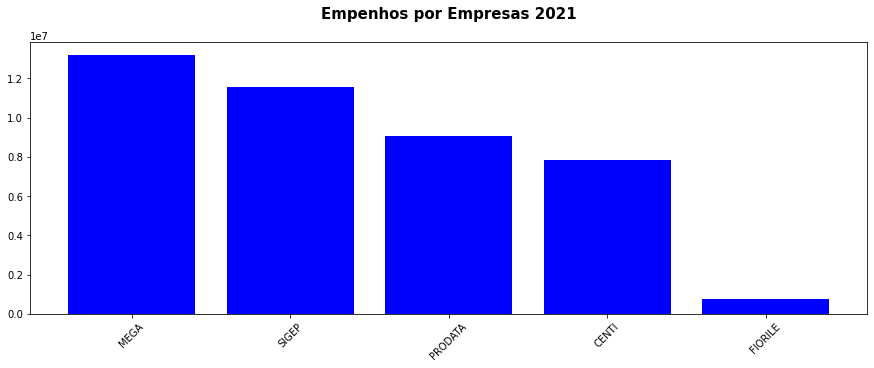

In [312]:
plt.figure(figsize=[15,5])
plt.bar(df_empresa_group.index, df_empresa_group.valor_empenho, color = 'blue', width = 0.8, align = 'center', )
plt.title('Empenhos por Empresas 2021\n', {'fontsize': 15,'fontweight': 'bold'})
plt.xticks(rotation=45)
plt.show()